# Data Science Decision Making - Agrotech

## Explainable machine learning and time series analysis

### Importing all the libraries

In [1]:
import pandas as pd
import seaborn as sns

### Reading the excel sheets to a dataframe

In [2]:
df = pd.ExcelFile('Data.xlsx')

In [3]:
df1 = pd.read_excel(df, 'plants')
df2 = pd.read_excel(df, 'flight dates')
df3 = pd.read_excel(df, 'planting')
df4 = pd.read_excel(df, 'weather')

In [4]:
df1.shape

(4859, 15)

### Renaming the columns for ease of life

In [5]:
df_new  = df1.rename(columns = {'Batch Number': 'batch_number', 'Plant Date': 'plant_date', 'Class': 'class', 
                                'Fresh Weight (g)': 'fresh_weight', 'Head Weight (g)': 'head_weight', 
                                'Radial Diameter (mm)': 'radial_diameter', 'Polar Diameter (mm)': 'polar_diameter', 
                                'Diameter Ratio': 'diameter_ratio', 'Leaves': 'leaves', 'Density (kg/L)': 'density',
                                'Leaf Area (cm^2)': 'leaf_area', 'Square ID': 'square_id', 
                                'Check Date': 'check_date', 'Flight Date': 'flight_date', 'Remove': 'remove'})

### Removing all the non-null values from the 'Remove column'

In [6]:
df_new = df_new[df_new['remove'].isnull()]

In [7]:
df_new.shape

(4789, 15)

### Finding the number of null values of different columns

In [8]:
df_new.isna().sum()

batch_number          0
plant_date          174
class                 0
fresh_weight          1
head_weight         105
radial_diameter     105
polar_diameter      105
diameter_ratio      107
leaves             4689
density             187
leaf_area             2
square_id             0
check_date            0
flight_date        4321
remove             4789
dtype: int64

In [9]:
df_new

,batch_number,plant_date,class,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,leaves,density,leaf_area,square_id,check_date,flight_date,remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaT,NaN
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaT,NaN
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaT,NaN
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaT,NaN


###  Renaming the columns of the flight dates sheet

In [10]:
df2 = df2.rename(columns = {'Batch Number': 'batch_number', 'Flight Date': 'flight_date'})

In [11]:
len(df_new['batch_number'].unique())

64

In [12]:
df_new['plant_date'].isnull().sum()

174

In [13]:
df_new.loc[df_new['flight_date'] != df_new['flight_date'], 'flight_date']
# Since in Pandas the NaN values are not equal to each other, this quirky code tells us the NaN values present 
# in our dataset. Even though it doesn't look logically right in the first glance.

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4854   NaT
4855   NaT
4856   NaT
4857   NaT
4858   NaT
Name: flight_date, Length: 4321, dtype: datetime64[ns]

### Merging the plants and the flight data 

In [14]:
df_merge = pd.merge(df_new, df2, how = 'left', on = 'batch_number')

### While merging 2 columns will be formed.
### We drop one of them and rename back the other one to the original

In [15]:
df_merge = df_merge.drop(columns = ['flight_date_x'])

In [16]:
df_merge = df_merge.rename(columns = {'flight_date_y' : 'flight_date'})

### Dropping the NaN values of the flight_date, head_weight, radial_diameter, polar_diameter

In [17]:
df_plant = df_merge.dropna(subset = ['flight_date', 'head_weight', 'radial_diameter', 'polar_diameter'])

### dropping the 'leaves' column as most rows are empty and not useful for us

In [18]:
df_plant = df_plant.drop(columns = ['leaves'])

### dropping the 'remove' column as we have already removed the non-empty rows and now this column is useless for us

In [19]:
df_plant = df_plant.drop(columns = ['remove'])

### Checking the number of Null values in the plant_date, since they are just 40, we shall drop those rows.

In [20]:
df_plant['plant_date'].isna().sum()

40

In [21]:
df_plant.dropna(subset = ['plant_date'], inplace = True)

In [22]:
df_plant

,batch_number,plant_date,class,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,density,leaf_area,square_id,check_date,flight_date
75,402,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,0.149230,730.0,570,2020-05-22,2020-04-30
76,402,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,0.298416,643.0,570,2020-05-22,2020-04-30
77,402,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,0.198625,647.0,570,2020-05-22,2020-04-30
78,402,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,0.208891,694.0,570,2020-05-22,2020-04-30
79,402,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,0.122498,730.0,570,2020-05-22,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,690,2020-08-06,1,513.0,144.0,100.0,95.0,1.052632,0.289494,450.0,92,2020-09-24,2020-09-09
3734,690,2020-08-06,1,514.0,158.0,110.0,100.0,1.100000,0.249387,500.0,92,2020-09-24,2020-09-09
3735,690,2020-08-06,2,500.0,106.0,98.0,93.0,1.053763,0.226659,530.0,92,2020-09-24,2020-09-09
3736,690,2020-08-06,4,480.0,137.0,108.0,82.0,1.317073,0.273565,490.0,92,2020-09-24,2020-09-09


### plotting the pairplot of the dataset

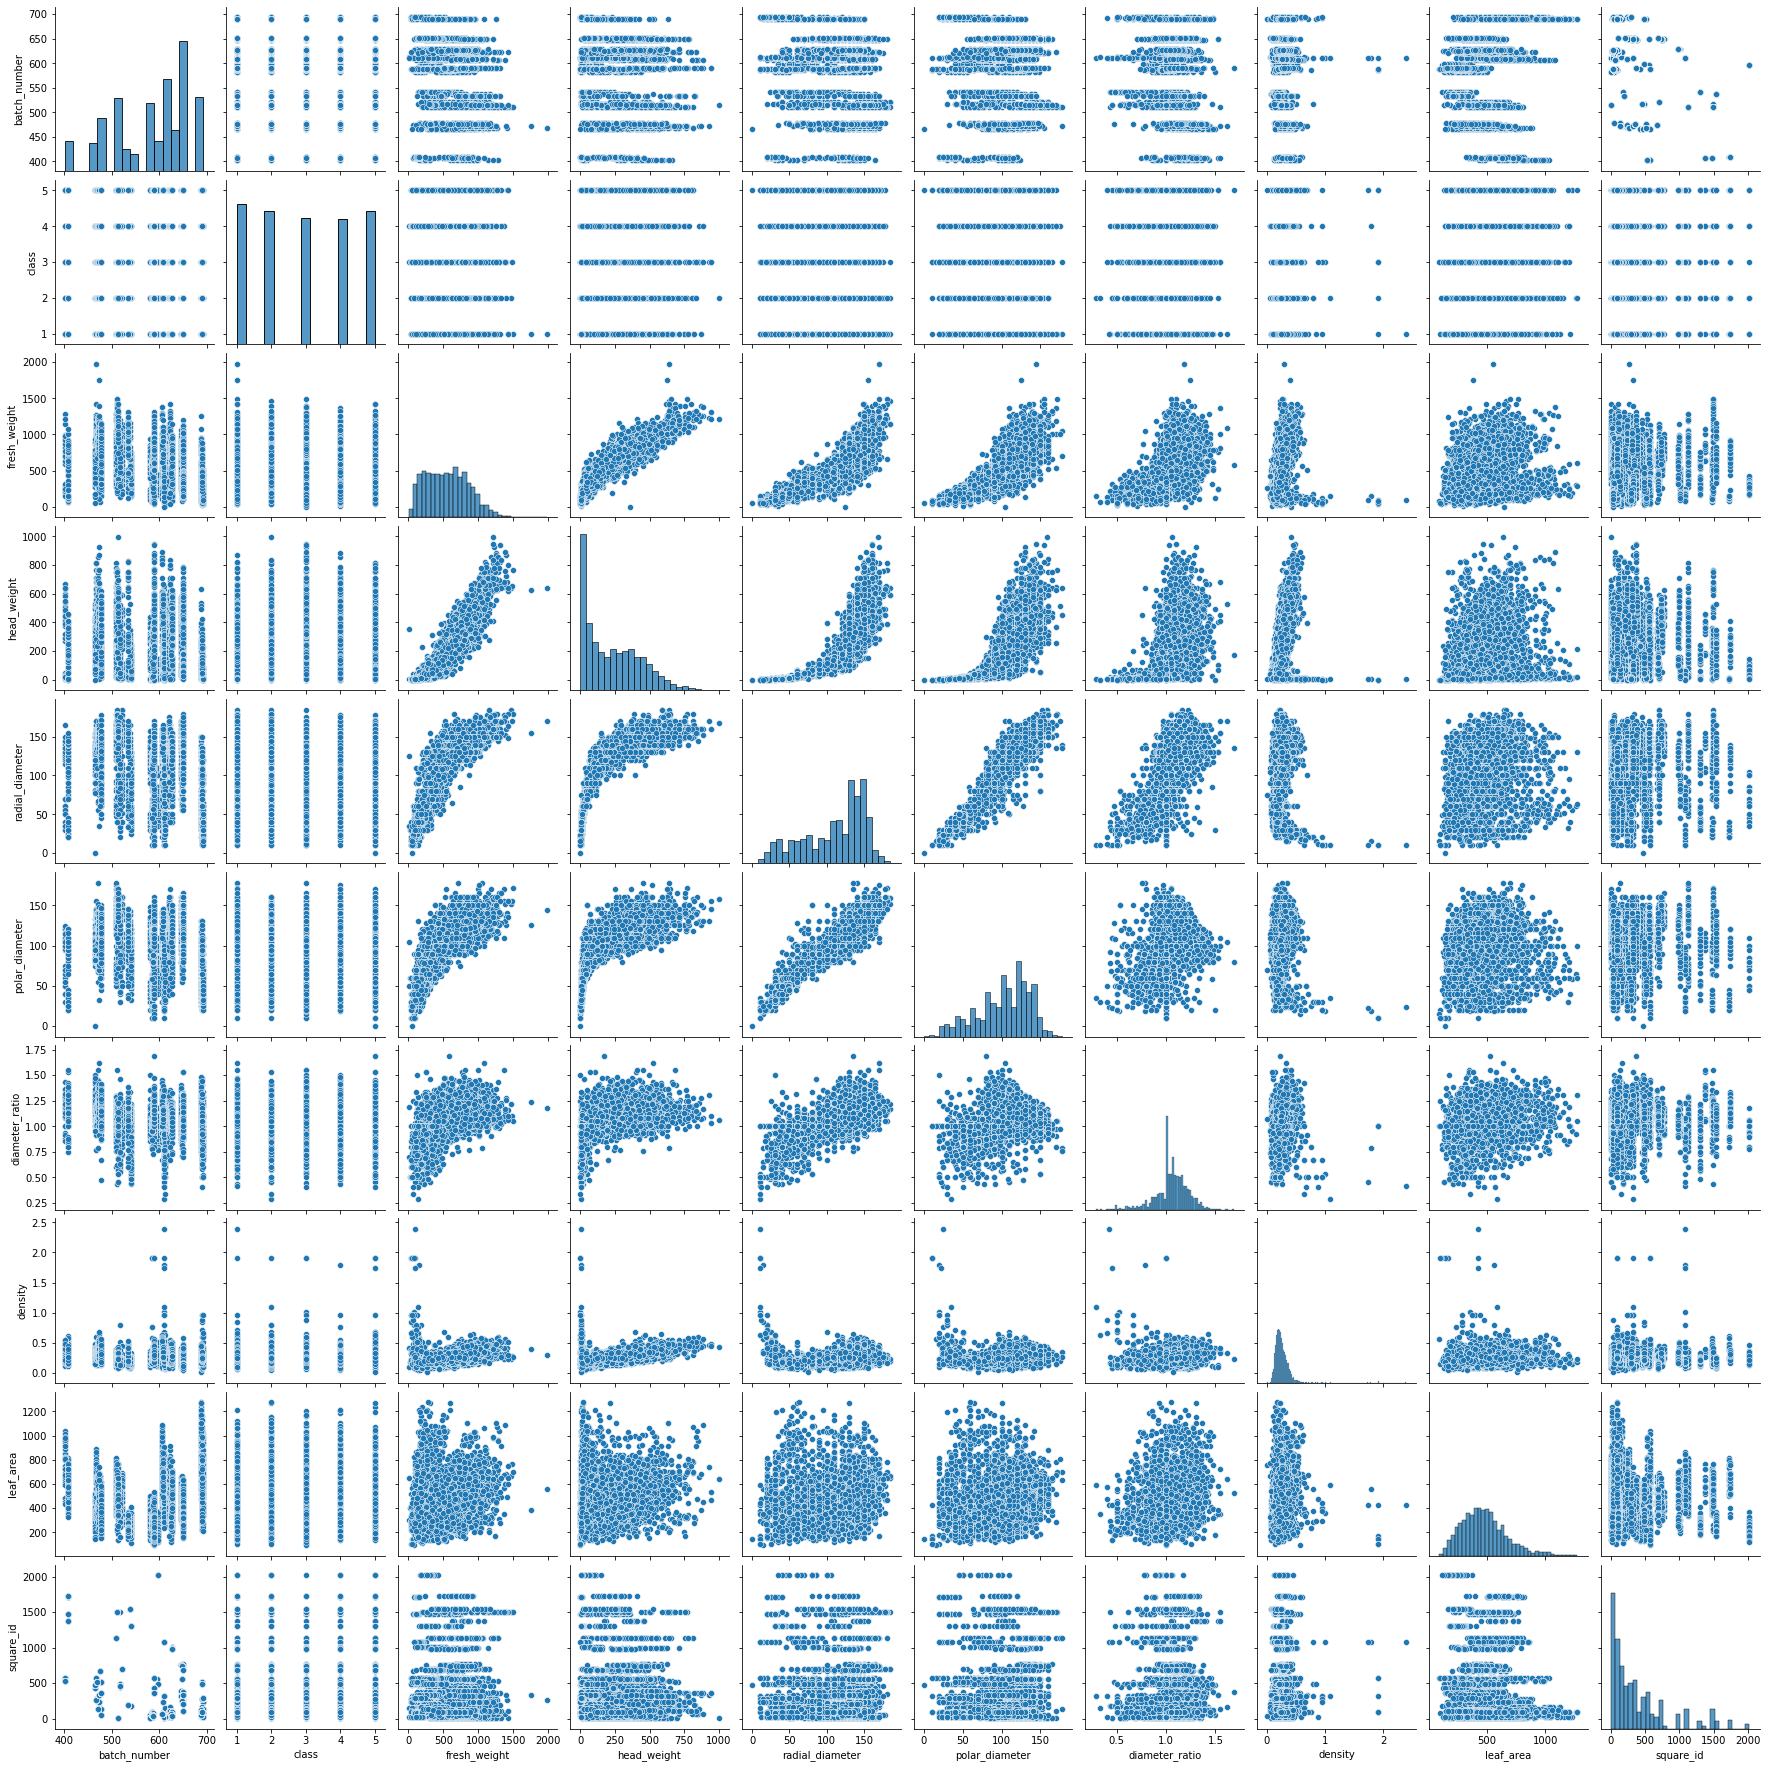

In [23]:
import seaborn as sns
print(sns.pairplot(df_plant))

In [24]:
df_plant.dropna(inplace=True)

### Dropping the empty columns of the weather sheet

In [25]:
df3.drop(columns = ['Column2', 'Column3', 'Column1', 'Column4'], inplace = True)

In [26]:
df_plant

,batch_number,plant_date,class,fresh_weight,head_weight,radial_diameter,polar_diameter,diameter_ratio,density,leaf_area,square_id,check_date,flight_date
75,402,2020-04-11,2,213.0,13.0,55.0,55.0,1.000000,0.149230,730.0,570,2020-05-22,2020-04-30
76,402,2020-04-11,5,179.0,10.0,40.0,40.0,1.000000,0.298416,643.0,570,2020-05-22,2020-04-30
77,402,2020-04-11,5,183.0,13.0,50.0,50.0,1.000000,0.198625,647.0,570,2020-05-22,2020-04-30
78,402,2020-04-11,3,176.0,7.0,40.0,40.0,1.000000,0.208891,694.0,570,2020-05-22,2020-04-30
79,402,2020-04-11,1,192.0,22.0,70.0,70.0,1.000000,0.122498,730.0,570,2020-05-22,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,690,2020-08-06,1,513.0,144.0,100.0,95.0,1.052632,0.289494,450.0,92,2020-09-24,2020-09-09
3734,690,2020-08-06,1,514.0,158.0,110.0,100.0,1.100000,0.249387,500.0,92,2020-09-24,2020-09-09
3735,690,2020-08-06,2,500.0,106.0,98.0,93.0,1.053763,0.226659,530.0,92,2020-09-24,2020-09-09
3736,690,2020-08-06,4,480.0,137.0,108.0,82.0,1.317073,0.273565,490.0,92,2020-09-24,2020-09-09


### Mkaing a new variable 'flight_time' which tells the number of days from the 'plant_date'

In [27]:

df_plant['flight_time'] = df_plant['flight_date'] - df_plant['plant_date']

In [28]:
df_plant['flight_time']

75     19 days
76     19 days
77     19 days
78     19 days
79     19 days
         ...  
3733   34 days
3734   34 days
3735   34 days
3736   34 days
3737   34 days
Name: flight_time, Length: 3195, dtype: timedelta64[ns]

In [29]:
df_plant['flight_time'] = df_plant['flight_time'].astype('timedelta64[D]')

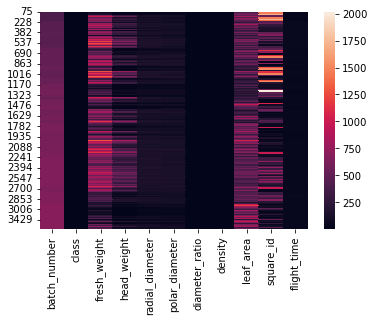

In [30]:
sns.heatmap(df_plant.drop(columns = ['flight_date', 'check_date', 'plant_date']))

In [31]:
df3 = df3.iloc[0:1821,:]

In [32]:
df3

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


In [33]:
df3

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0
